# Import all the Library and load dataset

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets # for using built-in datasets
from sklearn import metrics # for checking the model accuracy
df = pd.read_csv('D:\\Dataset\\archive\\full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [12]:
len(df)

4981

In [54]:
df = df.drop('work_type', axis=1)

In [55]:
df.keys()

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

# Data PreProcessing

In [56]:
 # Return number of missing values for each column
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
# Check what percentage of each column's data is missing
df.isnull().sum()/len(df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dfle = df
dfle.gender = le.fit_transform(dfle.gender)
dfle.ever_married = le.fit_transform(dfle.ever_married)
dfle.Residence_type = le.fit_transform(dfle.Residence_type)
dfle.smoking_status = le.fit_transform(dfle.smoking_status)
df = dfle
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,186.21,29.0,1,1


In [59]:
 # Return basic statistics summary of the dataset
print(df.describe())

            gender          age  hypertension  heart_disease  ever_married  \
count  4981.000000  4981.000000   4981.000000    4981.000000   4981.000000   
mean      0.416382    43.419859      0.096165       0.055210      0.658502   
std       0.493008    22.662755      0.294848       0.228412      0.474260   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%       0.000000    25.000000      0.000000       0.000000      0.000000   
50%       0.000000    45.000000      0.000000       0.000000      1.000000   
75%       1.000000    61.000000      0.000000       0.000000      1.000000   
max       1.000000    82.000000      1.000000       1.000000      1.000000   

       Residence_type  avg_glucose_level          bmi  smoking_status  \
count     4981.000000        4981.000000  4981.000000     4981.000000   
mean         0.508332         105.943562    28.498173        1.379442   
std          0.499981          45.075373     6.790464        1.072180   
min  

# Exploratory Data

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


In [61]:
# To display plots inside notebook
%matplotlib inline

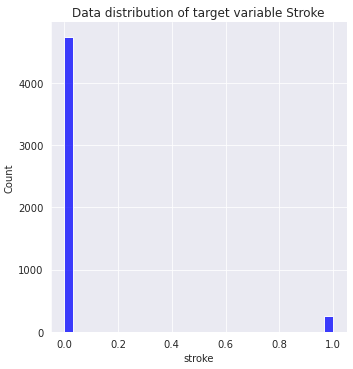

In [96]:
with sns.axes_style('darkgrid'):
 sns.displot(df['stroke'], bins=0, color='blue')
 plt.title("Data distribution of target variable Stroke");

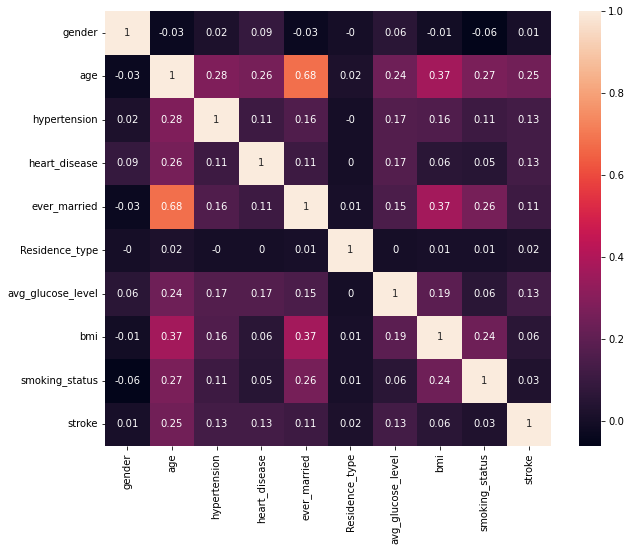

In [64]:
 # corr() to calculate the correlation between variables
correlation_matrix = df.corr().round(2)
# changing the figure size
plt.figure(figsize = (10, 8))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

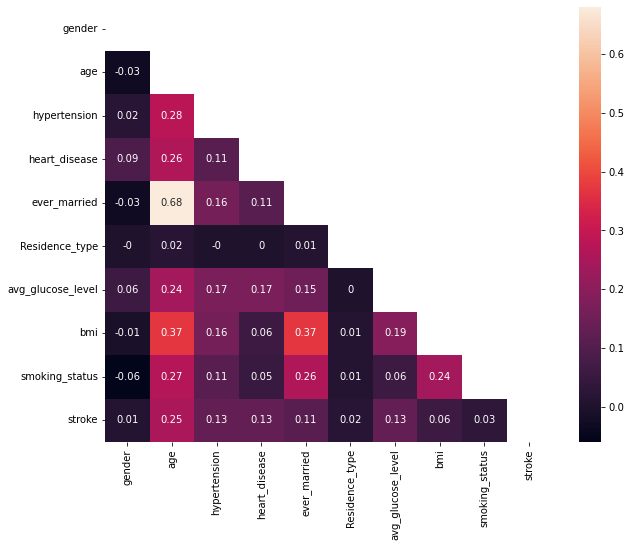

In [65]:
 # Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (10, 8))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

Text(0.5, 1.0, 'age and stroke')

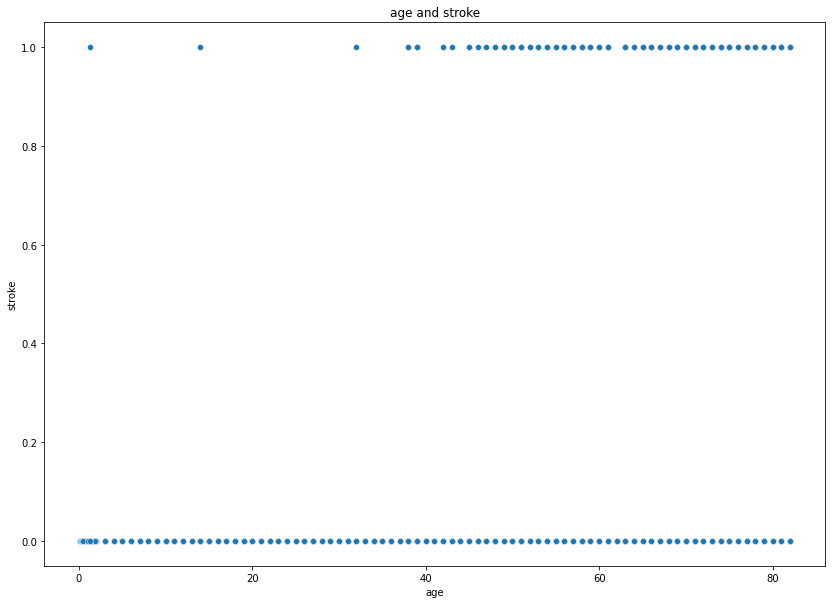

In [93]:
plt.figure(figsize=(14,10))
# Relatiosnship with 'age' and 'stroke'
#plt.subplot(2, 3, 2)
sns.scatterplot(x=df['age'], y=df['stroke'])
plt.title("age and stroke")

In [66]:
df.groupby('stroke').size()

stroke
0    4733
1     248
dtype: int64

Text(0.5, 1.0, 'Number of samples for stroke')

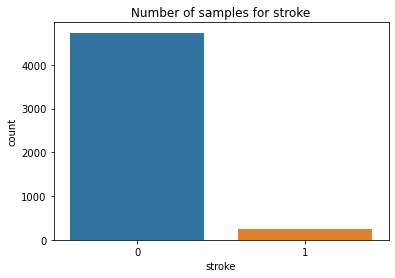

In [67]:
sns.countplot(x='stroke', data=df)
plt.title("Number of samples for stroke")

In [68]:
X = df.drop('stroke',axis='columns')
y = df.stroke

# Split the dataset

In [69]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3486, 9)
X_test shape:  (1495, 9)
y_train shape:  (3486,)
y_test shape:  (1495,)


# Create Model: Support Vector Machine (SVM)

In [72]:
 # importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9525
----------------------------------


#  Decision Tree

In [73]:
 # importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.905
---------------------------------


#  K Nearest Neighbours (KNN)

In [74]:
 # importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9425
----------------------------------


# Logistic Regression

In [75]:
 # importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.9518
---------------------------------


C:\Users\Mithun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Naive Bayes

In [76]:
 # importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8749
---------------------------------


In [79]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('DT', 0.905)
('LR', 0.9518)
('SVM', 0.9525)
('KNN', 0.9425)
('NB', 0.8749)
